In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
import json
import nltk
from wordcloud import WordCloud, STOPWORDS

In [265]:
movie = pd.read_csv('./dataset/TMDB5000/tmdb_5000_movies.csv')
credit = pd.read_csv('./dataset/TMDB5000/tmdb_5000_credits.csv')
print('Movie: ', movie.shape, 'Credit: ', credit.shape)

Movie:  (4803, 20) Credit:  (4803, 4)


In [266]:
print((movie['id']==credit['movie_id']).describe())
print()
print((movie['title']==credit['title']).describe())

count     4803
unique       1
top       True
freq      4803
dtype: object

count     4803
unique       1
top       True
freq      4803
Name: title, dtype: object


## Data clean

merge dataset, Delete unnecessary information and delete duplication

In [267]:
del credit['movie_id']
del credit['title']

del movie['homepage']
del movie['original_title']
del movie['overview']
del movie['tagline']

new_df = pd.concat([movie,credit],axis=1)
new_df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64


Missing value processing

In [268]:
nan = new_df['runtime'].isnull()
new_df.loc[nan,:]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


In [269]:
new_df.loc[2656,'runtime']='98'
new_df.loc[4140,'runtime']='82'
new_df.loc[nan,:]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,98,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,82,[],Released,"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


In [270]:
nan = new_df['release_date'].isnull()
new_df.loc[nan,:]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
4553,0,[],380097,[],en,0.0,[],[],NaN,0,0.0,[],Released,America Is Still the Place,0.0,0,[],[]


In [271]:
new_df.loc[4553,'release_date']= '2022-06-10'
new_df.loc[nan,:]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
4553,0,[],380097,[],en,0.0,[],[],2022-06-10,0,0.0,[],Released,America Is Still the Place,0.0,0,[],[]


Type Conversion

In [272]:
new_df.loc[:,'release_date'] = pd.to_datetime(new_df.loc[:,'release_date'],format='%Y-%m-%d',errors='coerce')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   id                    4803 non-null   int64         
 3   keywords              4803 non-null   object        
 4   original_language     4803 non-null   object        
 5   popularity            4803 non-null   float64       
 6   production_companies  4803 non-null   object        
 7   production_countries  4803 non-null   object        
 8   release_date          4803 non-null   datetime64[ns]
 9   revenue               4803 non-null   int64         
 10  runtime               4803 non-null   object        
 11  spoken_languages      4803 non-null   object        
 12  status                4803 non-null   object        
 13  title             

In [273]:
new_df['release_year']=new_df['release_date'].dt.year
new_df.loc[:,'release_year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: release_year, Length: 4803, dtype: int64

In [274]:
json_cols = ['genres','keywords','production_companies','spoken_languages','production_countries','cast','crew']

for i in json_cols:
    new_df[i]=new_df[i].apply(json.loads) 

In [275]:
def get_names(x):
    return ','.join(i['name'] for i in x)

In [276]:
df=new_df['genres'].apply(get_names)

df.head(10)

0    Action,Adventure,Fantasy,Science Fiction
1                    Adventure,Fantasy,Action
2                      Action,Adventure,Crime
3                 Action,Crime,Drama,Thriller
4            Action,Adventure,Science Fiction
5                    Fantasy,Action,Adventure
6                            Animation,Family
7            Action,Adventure,Science Fiction
8                    Adventure,Fantasy,Family
9                    Action,Adventure,Fantasy
Name: genres, dtype: object

In [277]:
for i in json_cols:
    new_df[i]=new_df[i].apply(get_names)

## Visualization

### Genres

In [278]:
genres_ = set()
for i in new_df['genres'].str.split(','):
    genres_ = set().union(i,genres_)
genres_=list(genres_)
genres_.remove('')
print(genres_)

['Foreign', 'Music', 'Crime', 'TV Movie', 'Fantasy', 'Animation', 'Family', 'Drama', 'Science Fiction', 'Documentary', 'Action', 'Horror', 'History', 'Adventure', 'Mystery', 'War', 'Comedy', 'Romance', 'Western', 'Thriller']


In [279]:
for i in genres_:
    new_df[i]=new_df['genres'].str.contains(i).apply(lambda x : 1 if x else 0)
new_df.head(5)

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,...,Action,Horror,History,Adventure,Mystery,War,Comedy,Romance,Western,Thriller
0,237000000,"Action,Adventure,Fantasy,Science Fiction",19995,"culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,...,1,0,0,1,0,0,0,0,0,0
1,300000000,"Adventure,Fantasy,Action",285,"ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,...,1,0,0,1,0,0,0,0,0,0
2,245000000,"Action,Adventure,Crime",206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,...,1,0,0,1,0,0,0,0,0,0
3,250000000,"Action,Crime,Drama,Thriller",49026,"dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,...,1,0,0,0,0,0,0,0,0,1
4,260000000,"Action,Adventure,Science Fiction",49529,"based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,...,1,0,0,1,0,0,0,0,0,0


In [280]:
new_genres = pd.DataFrame()
new_genres = new_df.groupby('release_year').sum()
new_genres.head(5)

,budget,id,popularity,revenue,vote_average,vote_count,Foreign,Music,Crime,TV Movie,...,Action,Horror,History,Adventure,Mystery,War,Comedy,Romance,Western,Thriller
release_year,,,,,,,,,,,,,,,,,,,,,
1916,385907,3059,3.232447,8394751,7.4,60,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1925,245000,3060,0.785744,22000000,7.0,21,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1927,92620000,19,32.351527,650422,8.0,657,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1929,379000,66108,2.793049,4358000,12.6,64,0,1,0,0,...,0,0,0,0,0,0,0,2,0,1
1930,3950000,22301,8.484123,8000000,6.1,19,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


The changes of films categories during time

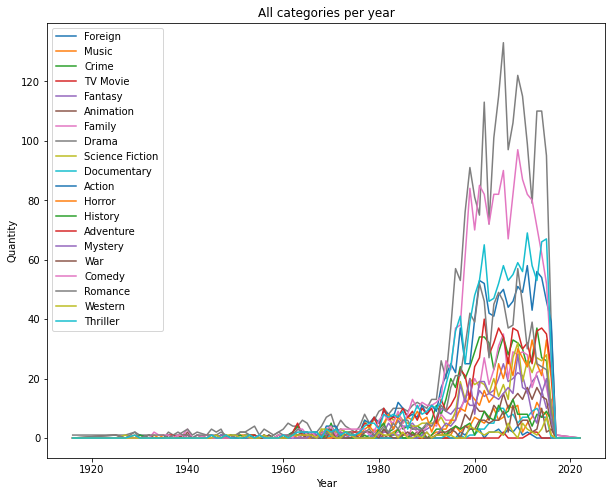

In [281]:
plt.figure(figsize=(10,8))
ax1=plt.subplot(1,1,1)
new_genres[genres_].plot(label='genres',kind='line',ax=ax1)
plt.title('All categories per year')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()

Ranking of film categories shooting times

In [282]:
genres = new_genres[genres_].sum(axis=0).sort_values(ascending=True)
genres

TV Movie              8
Foreign              34
Western              82
Documentary         110
War                 144
Music               185
History             197
Animation           234
Mystery             348
Fantasy             424
Family              513
Horror              519
Science Fiction     535
Crime               696
Adventure           790
Romance             894
Action             1154
Thriller           1274
Comedy             1722
Drama              2297
dtype: int64

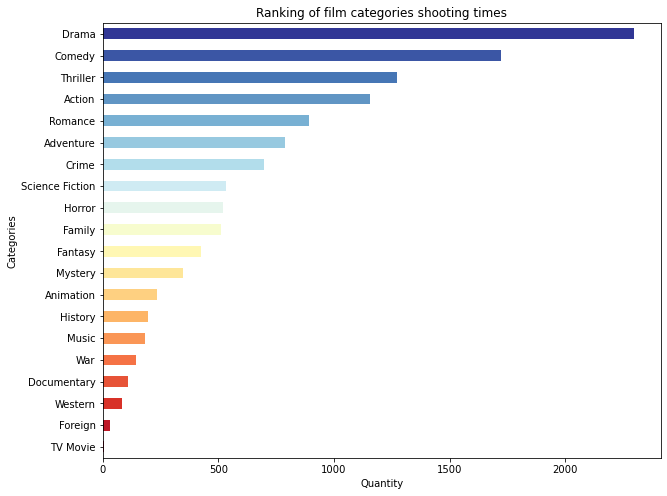

In [283]:
plt.figure(figsize=(10,8))
colors = cm.RdYlBu(np.linspace(0,1,len(genres)))
genres.plot(kind='barh',color=colors)
plt.title('Ranking of film categories shooting times')
plt.xlabel('Quantity')
plt.ylabel('Categories')
plt.show()

In [284]:
# plt.figure(figsize=(10,8))
# colors = cm.RdYlBu(np.linspace(0,1,len(genres)))
# genres.plot(kind='barh',color=colors)
# plt.title('Ranking of film revenue')
# plt.xlabel('Quantity')
# plt.ylabel('Revenue')
# plt.show()

### Countries

In [298]:
index = 0
for i in new_df['production_countries']:
    if ',' in i:
        v = 'Cooperation' 
    elif len(i)==0:
        v = 'nan'
    else:
        v = i.split(',')[0]
    new_df.loc[index,'product_countries'] = v 
    index+=1

new_df['product_countries'].value_counts()
countries = new_df['product_countries'].value_counts().drop('nan')
# new_countries = new_df[['production_countries','release_year']]
# new_countries.head(5)


### Companies

### Directors and Cast

### Keywords

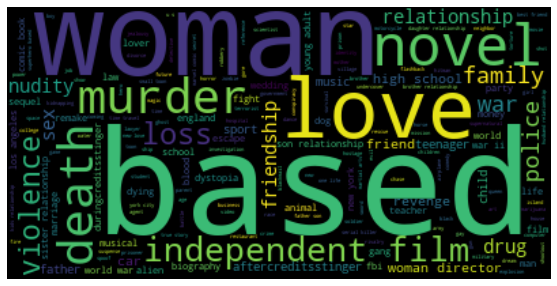

In [327]:
keywords = ''.join(i for i in new_df['keywords'])
stopwords = set(STOPWORDS)
worldcloud =WordCloud(background_color='black',stopwords=',').generate(keywords)
plt.figure(figsize=(10,5))
plt.imshow(worldcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Revenue correlation

In [286]:
corr_df = new_df.corr()
corr_df['revenue'].sort_values(ascending=False)

revenue            1.000000
vote_count         0.781487
budget             0.730823
popularity         0.644724
Adventure          0.344400
Fantasy            0.212287
Action             0.203590
Animation          0.199335
vote_average       0.197150
Family             0.170067
Science Fiction    0.152621
release_year       0.090001
War                0.002046
Thriller          -0.004488
Mystery           -0.006796
TV Movie          -0.020634
Western           -0.029148
History           -0.031417
Crime             -0.040726
Music             -0.041550
Foreign           -0.042465
Comedy            -0.050369
id                -0.050425
Romance           -0.065368
Documentary       -0.068089
Horror            -0.082753
Drama             -0.177229
Name: revenue, dtype: float64

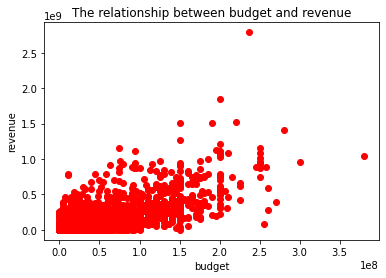

In [287]:
# plt.figure(figsize=(10, 10))
x = new_df.loc[:,'budget']
y = new_df.loc[:,'revenue'] 
plt.scatter(x,y,color='r')
plt.title('The relationship between budget and revenue')
plt.xlabel('budget')
plt.ylabel('revenue')
plt.show()